<a href="https://colab.research.google.com/github/nurajannat11/simulation-and-modelling/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated Dataset (exam scores): [91 88 97 99 95 92 97 89 91 94 87 91]

Sample Mean = 92.58
Sample Std Dev = 3.82
Sample Size = 12

--- One-Sample t-Test Result ---
T-statistic = 24.982
P-value = 0.000

--- 95% Confidence Interval ---
CI = (90.15, 95.01)

Decision: Reject H0 (The sample mean is significantly different from 65).


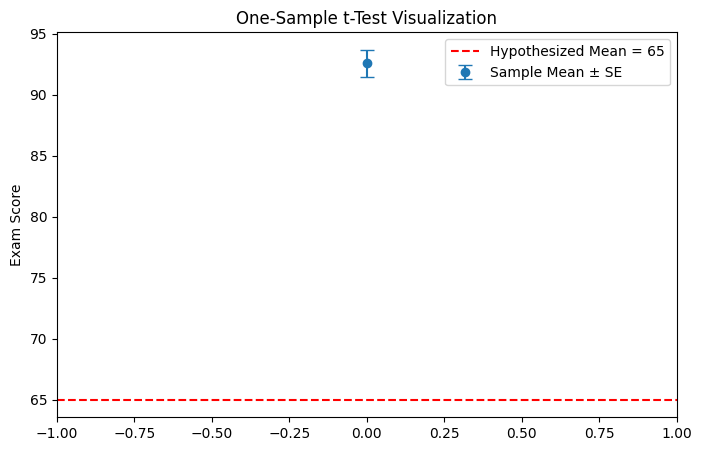

In [1]:
# --- One-Sample t-Test with Python ---
# Google Colab Notebook

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ===============================
# 1. Dataset Generation
# ===============================

# Rule: exam scores = 60 + randint(0,15,size=12) + (k*5), where k = last two digits of ID.
# Your last digit = 5 → k = 5
k = 5
np.random.seed(42)  # for reproducibility (you can remove to get different values each run)
exam_scores = 60 + np.random.randint(0, 15, size=12) + (k * 5)

print("Generated Dataset (exam scores):", exam_scores)

# ===============================
# 2. State the Hypothesis
# ===============================
# H0: Population mean = 65
# H1: Population mean ≠ 65

mu_0 = 65   # hypothesized population mean
sample_mean = np.mean(exam_scores)
sample_std = np.std(exam_scores, ddof=1)
n = len(exam_scores)

print(f"\nSample Mean = {sample_mean:.2f}")
print(f"Sample Std Dev = {sample_std:.2f}")
print(f"Sample Size = {n}")

# ===============================
# 3. Perform One-Sample t-test
# ===============================
t_stat, p_value = stats.ttest_1samp(exam_scores, mu_0)

print("\n--- One-Sample t-Test Result ---")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value = {p_value:.3f}")

# ===============================
# 4. Confidence Interval (95%)
# ===============================
alpha = 0.05
df = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df)  # two-tailed
margin_of_error = t_crit * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print("\n--- 95% Confidence Interval ---")
print(f"CI = ({ci_lower:.2f}, {ci_upper:.2f})")

# ===============================
# 5. Decision
# ===============================
if p_value < alpha:
    print("\nDecision: Reject H0 (The sample mean is significantly different from 65).")
else:
    print("\nDecision: Fail to Reject H0 (No significant difference from 65).")

# ===============================
# 6. Visualization
# ===============================
plt.figure(figsize=(8,5))
plt.errorbar(x=[0], y=[sample_mean], yerr=sample_std/np.sqrt(n), fmt='o', capsize=5, label="Sample Mean ± SE")
plt.axhline(y=mu_0, color='red', linestyle='--', label=f"Hypothesized Mean = {mu_0}")
plt.xlim(-1, 1)
plt.ylabel("Exam Score")
plt.title("One-Sample t-Test Visualization")
plt.legend()
plt.show()
